In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

0. The Client Brief<br>
"Hi, this is Nisha, I work at the Albuquerque Environmental Health Department. We are on a mission to improve the air quality in our city. Our current mission: get polluting cars off the road and repaired before they are coming in for their regular emissions check. Can you help us?"

1. Background Research

* What is current air quality like in Albuqurque compared to the US?

In [14]:
data = {"County_Name": ["Erie, PA", "Bernalillo, NM", "Fresno, CA"],
       "Grade_Ozone": ["B", "F", "F"],
       "Grade_Particle_Pollution": ["A", "A", "F"]}
df = pd.DataFrame(data, index=["Best County", "Bernalillo, NM", "Worse County"])
print("Comparison of Bernalillo County's air quality grade (A = no air quality exceedences)\
to best and worse US air quality counties (2016 - 2018)")
df
# resources:
# State of the Air 2020, American Lung Association
# Environmental Protection Agency, https://www.epa.gov
# A = no days of air quality index exceedences of 100
# F = 9 or more days of above 100 air quality index

Comparison of Bernalillo County's air quality grade (A = no air quality exceedences)to best and worse US air quality counties (2016 - 2018)


,County_Name,Grade_Ozone,Grade_Particle_Pollution
Best County,"Erie, PA",B,A
"Bernalillo, NM","Bernalillo, NM",F,A
Worse County,"Fresno, CA",F,F


* How has air quality changed over time?

In [13]:
#Change in Ozone levels (Parts per million)
level_ozone_2000 = 0.075
level_ozone_2015 = 0.066
change_ozone = round(level_ozone_2015 - level_ozone_2000, 4)

#Change in Carbon Monoxide levels (Parts per million)
level_CO_2000 = 3.8
level_CO_2015 = 1.4
change_CO = round(level_CO_2015 - level_CO_2000, 4)

#Change in Nitrogen Dioxide levels (Parts per billion)
level_NO_2000 = 65
level_NO_2015 = 45
change_NO = level_NO_2015 - level_NO_2000
#convert to ppm
change_NO = change_NO/1000

#Percent change Ozone
percent_ozone = round(change_ozone/level_ozone_2000 * 100, 4)
percent_CO = round(change_CO/level_CO_2000 * 100, 4)
precent_NO = round(change_NO/level_NO_2000 * 100, 4)

data = {"change_ppm": [change_ozone, change_CO, change_NO], "percent_change": [percent_ozone, percent_CO, precent_NO]}
df_change = pd.DataFrame(data = data, index = ["Ozone", "Carbon_Monoxide", "Nitrogen_Dioxide"])
print("Change in three air pollutants from 2000 to 2015 in Albuquerque")
df_change
#resources
# City of Albuquerque, https://www.cabq.gov/airquality/trends 

Change in three air pollutants from 2000 to 2015 in Albuquerque


,change_ppm,percent_change
Ozone,-0.009,-12.0000
Carbon_Monoxide,-2.400,-63.1579
Nitrogen_Dioxide,-0.020,-0.0308


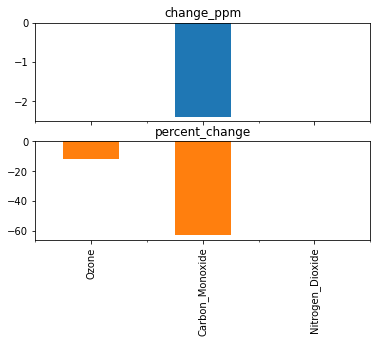

In [15]:
df_change.plot(kind='bar', subplots=True, legend=False)
None

In [23]:
sns.set_theme()

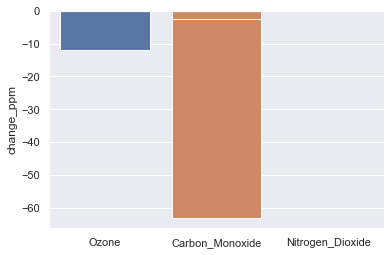

In [32]:
percent_change_plot = sns.barplot(
    data=df_change,
    x = df_change.index,
    y = "percent_change"

)
change_ppm_plot = sns.barplot(
    data=df_change,
    x = df_change.index,
    y = "change_ppm"

)
#my_plot.set(ylim=(-2.5, 0))
None

In [18]:
df.index

Index(['Best County', 'Bernalillo, NM', 'Worse County'], dtype='object')

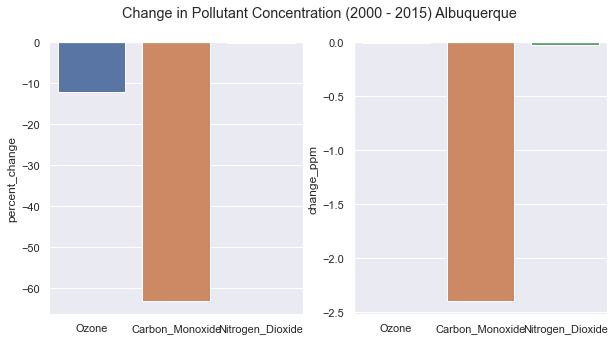

In [43]:
figure, axes = plt.subplots(1, 2, sharex=False, figsize=(10, 5))
figure.suptitle("Change in Pollutant Concentration (2000 - 2015) Albuquerque")
sns.barplot(ax = axes[0], data=df_change, x = df_change.index, y = "percent_change")
sns.barplot(ax = axes[1], data=df_change, x = df_change.index, y = "change_ppm")
None

In [ ]:
# resources:
# Air Care Facts, City of Albuquerque (pamphlet)
# City of Albuquerque, https://www.cabq.gov/airquality/trends 
# Environmental Protection Agency, https://www.epa.gov/outdoor-air-quality-data/air-data-daily-air-quality-tracker

* What is the emissions test process?

* How is emissions test data collected?